# Analyzing the Color Pallette of the CryptoPunks

We ended the last chapter with a question, "why does our model behave so exceptionally well?". To answer this, we'll need to build an intuition for how colors are used in the crypto punks. Remember, the CryptoPunks are 32x32x3 images where the 3 elemente array at each point in the 2D image represents a pixel encoded in the Red, Green, Blue (RGB) color encoding scheme. 

Let's imagine the punks were created with black and white pixels exclusively. In this case, our punks would be much simpler. In fact, there would be only be a total of 2.47e+173 total black and white punks that could ever be created. We might expect our classifier to behave really well with these simpler punks. Let's give it a try.

In [ ]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import cpunks.cpunks10k as cpunks10k

from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

In [2]:
cp = cpunks10k.cpunks10k()

In [3]:
labels = ['alien', 'ape', 'zombie', 'male', 'female']
(X_train, Y_train), (X_test, Y_test) = cp.load_data(labels)

In [4]:
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((9000, 24, 24, 4), (9000, 6)), ((1000, 24, 24, 4), (1000, 6)))

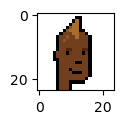

In [5]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[1])

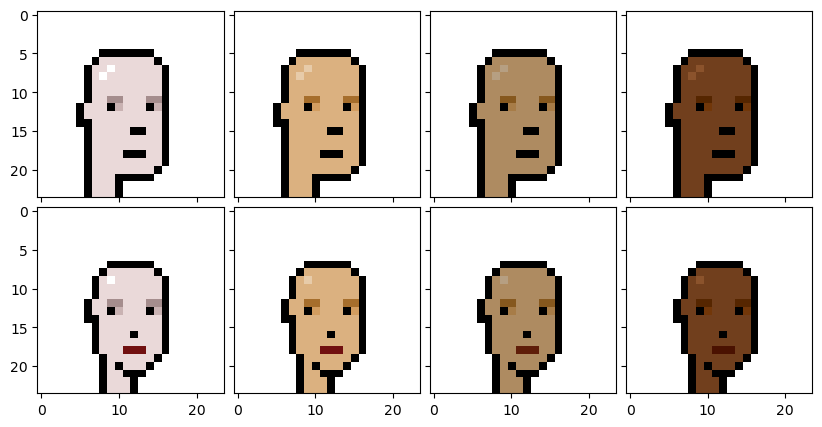

In [6]:
Xs = [X_train[3307],
      X_train[281], 
      X_train[510],
      X_train[741],
      X_train[6487],
      X_train[641],
      X_train[1050],
      X_train[2204]]
nrows = 2
ncols = 4

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, Xs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

### how to make black and white punk
    - skin tones to white
    - keep any black
    - everything else to white
    
skin tones are represented in :
#3307, #281, #510, #741:
 #6487, #641, #1050, #2204:

In [ ]:
transparency = np.array([0., 0., 0., 0.], dtype = np.float32)
white = np.array([1., 1., 1., 1.], dtype = np.float32)
black = np.array([0., 0., 0., 1.], dtype = np.float32)
s1 = np.array([0.68235296, 0.54509807, 0.38039216, 1.], dtype = np.float32)
s2 = np.array([0.44313726, 0.24705882, 0.11372549, 1.], dtype = np.float32)
s3 = np.array([0.85882354, 0.69411767, 0.5019608 , 1.], dtype = np.float32)
s4 = np.array([0.91764706, 0.8509804 , 0.8509804 , 1.], dtype = np.float32)

def color_map_bw(color):
    #if (1): return color
    if np.all(color == transparency):
        return color
    if np.all(color == s1) or np.all(color == s2) or np.all(color == s3) or np.all(color == s4):
        return white
    return black
    
img = X_train[2204]
img_bw = np.array([[color_map_bw(c) for c in row] for row in img])
plt.imshow(img_bw)

now, we can wrap that transformation a function so that we can create a new training set containing the simplified black and white punks. 

In [31]:
class ColorMap:
    transparency = np.array([0., 0., 0., 0.], dtype = np.float32)
    white = np.array([1., 1., 1., 1.], dtype = np.float32)
    black = np.array([0., 0., 0., 1.], dtype = np.float32)
    s1 = np.array([0.68235296, 0.54509807, 0.38039216, 1.], dtype = np.float32)
    s2 = np.array([0.44313726, 0.24705882, 0.11372549, 1.], dtype = np.float32)
    s3 = np.array([0.85882354, 0.69411767, 0.5019608 , 1.], dtype = np.float32)
    s4 = np.array([0.91764706, 0.8509804 , 0.8509804 , 1.], dtype = np.float32)
    
    def color_to_black_white(self, color):
        if np.all(color == self.transparency):
            return color
        if np.all(color == self.s1) or np.all(color == self.s2) or np.all(color == self.s3) or np.all(color == self.s4):
            return self.white
        return self.black
    
    def bg_to_color(self, color, bg_color):
        if np.all(color == self.transparency):
            return bg_color
        return color
    
    def img_bg_to_color(self, img, color):
        return np.array([[self.bg_to_color(color) for c in row] for row in img])
        
    
    def img_to_black_white(self, img):
        return np.array([[self.color_to_black_white(c) for c in row] for row in img])

In [30]:
x = [0.68235296, 0.54509807, 0.38039216, 1.]
str(x)

'[0.68235296, 0.54509807, 0.38039216, 1.0]'

my first job out of college was in the rutgers university center for cognitive science. here is where i learned the basics
of image processing for machine learning. i was working on a system for classifying images based on features in the data - much like
the work i'm presenting here. to simplfiy the probelm , we deteced edges on all images and converted to black and white under 
the assumption that this simplified image representaionat would be easier to model. now, let's see if this assumption holds wiht our new black and white 
crypto punks

In [14]:
cm = ColorMap()

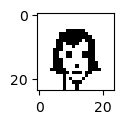

In [16]:
plt.figure(figsize = (5,1))
plt.imshow(cm.img_to_black_white(X_train[0]))

In [17]:
X = np.concatenate((X_train, X_test), axis=0)
bw_punks = np.array([cm.img_to_black_white(img) for img in X])

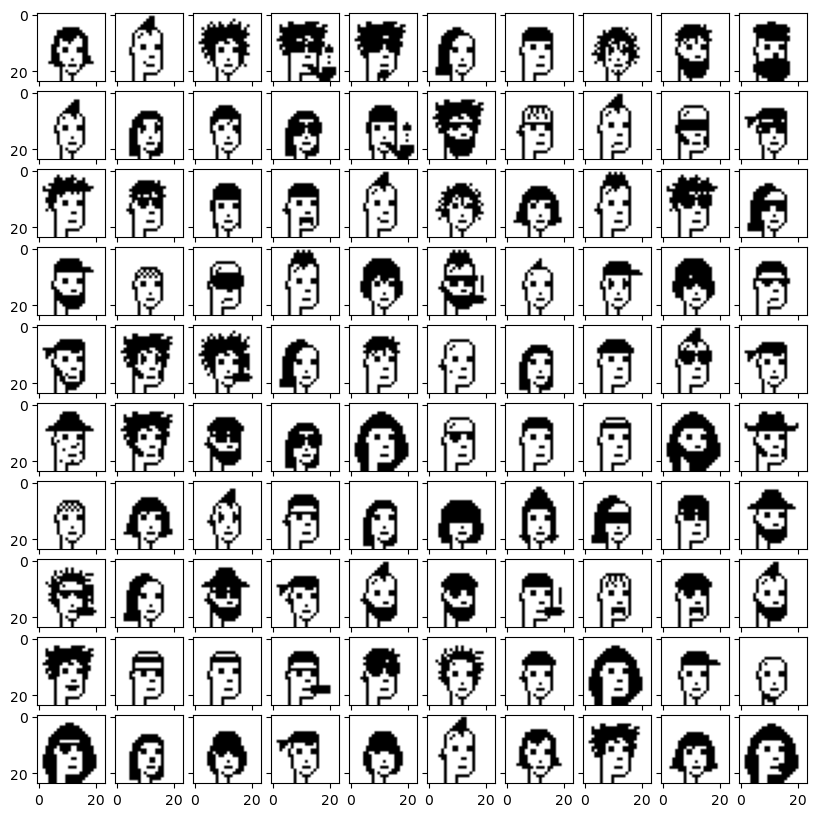

In [18]:


nrows = 10
ncols = 10

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, bw_punks[0:(nrows * ncols)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


## Train a model using these new punks

In [19]:
X_train = bw_punks[0:9000]
X_test = bw_punks[9000:10000]

In [20]:
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((9000, 24, 24, 4), (9000, 6)), ((1000, 24, 24, 4), (1000, 6)))

#### Update the model to use the transparency layer. 

In [25]:

input_layer = Input(shape = (24, 24, 4))
x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units=len(cp.labels), activation = 'softmax')(x)

model = Model(input_layer, output_layer)

#### create the optimizer

In [26]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics = ['accuracy'])

#### train the model 

In [27]:
model.fit(X_train,
          Y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
282/282 [==============================] - 2s 6ms/step - loss: 0.1300 - accuracy: 0.9497
Epoch 2/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0102 - accuracy: 0.9963
Epoch 3/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0082 - accuracy: 0.9966
Epoch 4/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0068 - accuracy: 0.9970
Epoch 5/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0100 - accuracy: 0.9951
Epoch 6/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0106 - accuracy: 0.9948
Epoch 7/10
282/282 [==============================] - 2s 5ms/step - loss: 0.0098 - accuracy: 0.9959
Epoch 8/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0054 - accuracy: 0.9976
Epoch 9/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0074 - accuracy: 0.9964
Epoch 10/10
282/282 [==============================] - 2s 6ms/step - loss: 0.0075 - accuracy: 0.9968

#### Evaluate the Model

In [28]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9980


[0.004499515518546104, 0.9980000257492065]

In [ ]:
labels=np.array(labels)

preds = model.predict(X_test)
preds_single = labels[np.argmax(preds, axis=-1)]
actual_single = labels[np.argmax(Y_test, axis=-1)]

In [ ]:
n=10
indices = np.random.choice(range(len(X_test)), n)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            f"{idx}:  {str(actual_single[idx])}", 
            fontsize=10, 
            ha='center',
            transform=ax.transAxes)
    ax.text(0.5, 
            -0.70, 
            'pred  = ' + str(preds_single[idx]), 
            fontsize=10,  
            ha='center',
           transform=ax.transAxes)
    ax.imshow(img)

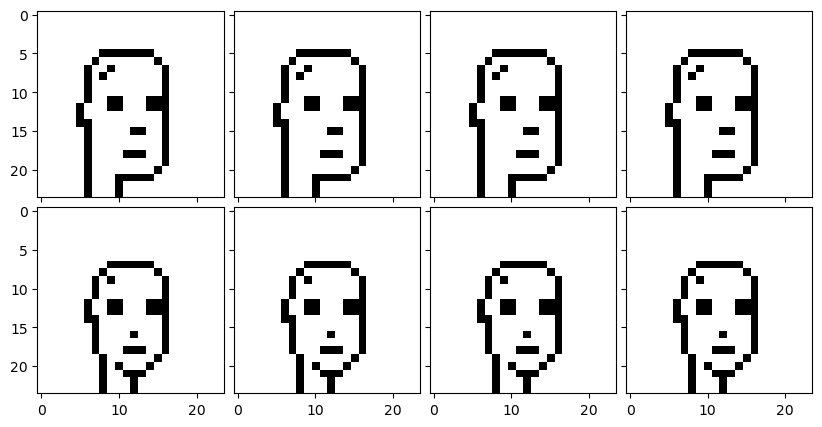

In [29]:
Xs = [X_train[3307],
      X_train[281], 
      X_train[510],
      X_train[741],
      X_train[6487],
      X_train[641],
      X_train[1050],
      X_train[2204]]
nrows = 2
ncols = 4

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, Xs):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

the machine learning models picks up on the distinct features between male and female.

incidentally, this example is meant to highlight how through inquiry and experimentation , we can incidentally inspire art. the black and white punks we created here are our first piece of generative art, in which we've take the orgainl crypto punks and created a derivative work.

in this case, we are not the first to stumble on the idea. 
https://mintable.app/Collectibles/item/Black-white-cryptopunk--173/aHcrlR5-tcNYOKE

In the case of above, they are likely done manually and the id's don't correpsond to original cryptopunks. they are inspried by and note derived from.
in our case, we've generated 10,000 of these and they are true to the orgianl source materials. as we proceed through the exercises, this will
be an important property to maintain. as we want to build on history in art and be able to trace lineage back to prior works.